In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# seaborn to show graphs in jupyter
%matplotlib inline

# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims_data=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Case Study 3 - Insurance Claims Case Study/claims.csv')

In [3]:
cust_demo=pd.read_csv('C:/Users/Ajay/Downloads/Python Case Studies/Case Study 3 - Insurance Claims Case Study/cust_demographics.csv')

In [4]:
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [5]:
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
cust_claim=pd.merge(cust_demo,claims_data, how='left',left_on='CUST_ID',right_on='customer_id')

In [13]:
cust_claim.head(20)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100.0,Natural causes,04/12/2017,Auto,Unknown,Material only,$1440,1.0,No
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252.0,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616.0,Other causes,09/26/2018,Auto,No,Material only,$2240,2.0,No
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443.0,Other driver error,10/04/2017,Auto,No,Injury only,$38306.5,3.0,Yes
9,21831191,Male,1977-05-17,NH,419-712-8513,Gold,91475471.0,Driver error,02/09/2018,Auto,Unknown,Material and injury,$36810,1.0,No


In [8]:
cust_claim.drop('customer_id', axis=1, inplace=True)

# 2.  Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [9]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   int64  
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1085 non-null   float64
 7   incident_cause       1085 non-null   object 
 8   claim_date           1085 non-null   object 
 9   claim_area           1085 non-null   object 
 10  police_report        1085 non-null   object 
 11  claim_type           1085 non-null   object 
 12  claim_amount         1020 non-null   object 
 13  total_policy_claims  1075 non-null   float64
 14  fraudulent           1085 non-null   object 
dtypes: float64(2), int64(1), object(12)
me

In [14]:
cust_claim.DateOfBirth=pd.to_datetime(cust_claim.DateOfBirth, format="%d-%b-%y")
cust_claim.claim_date= pd.to_datetime(cust_claim.claim_date, format='mixed')

In [17]:
cust_claim.DateOfBirth.max()

Timestamp('2068-12-19 00:00:00')

In [19]:
cust_claim.DateOfBirth= np.where(cust_claim.DateOfBirth.dt.year >2000, cust_claim.DateOfBirth-pd.DateOffset(years=100), cust_claim.DateOfBirth)

In [21]:
cust_claim.head(20)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,798-631-4758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,413-187-7945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No
5,47830476,Female,1986-05-01,MA,413-187-7945,Silver,91609100.0,Natural causes,2017-04-12,Auto,Unknown,Material only,$1440,1.0,No
6,19269962,Male,1977-05-13,NV,956-871-8691,Gold,22890252.0,Crime,2018-01-13,Auto,No,Material only,$2680,1.0,No
7,19269962,Male,1977-05-13,NV,956-871-8691,Gold,39219616.0,Other causes,2018-09-26,Auto,No,Material only,$2240,2.0,No
8,21831191,Male,1977-05-17,NH,419-712-8513,Gold,24050443.0,Other driver error,2017-10-04,Auto,No,Injury only,$38306.5,3.0,Yes
9,21831191,Male,1977-05-17,NH,419-712-8513,Gold,91475471.0,Driver error,2018-02-09,Auto,Unknown,Material and injury,$36810,1.0,No


# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [22]:
cust_claim.Contact=pd.to_numeric(cust_claim.Contact.str.replace("-", ""), downcast='integer')
cust_claim.claim_amount= pd.to_numeric(cust_claim.claim_amount.str.replace("$",""), downcast='float')

In [23]:
cust_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1092 non-null   int64         
 1   gender               1092 non-null   object        
 2   DateOfBirth          1092 non-null   datetime64[ns]
 3   State                1092 non-null   object        
 4   Contact              1092 non-null   int64         
 5   Segment              1092 non-null   object        
 6   claim_id             1085 non-null   float64       
 7   incident_cause       1085 non-null   object        
 8   claim_date           1085 non-null   datetime64[ns]
 9   claim_area           1085 non-null   object        
 10  police_report        1085 non-null   object        
 11  claim_type           1085 non-null   object        
 12  claim_amount         1020 non-null   float32       
 13  total_policy_claims  1075 non-nul

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [24]:
cust_claim.police_report.unique()

array(['No', 'Unknown', 'Yes', nan], dtype=object)

In [25]:
cust_claim['alert_flag']=np.where(cust_claim.police_report =='No',0, np.where(cust_claim.police_report=='Yes',1,np.nan))

In [26]:
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,0.0


In [27]:
cust_claim.drop('police_report', axis=1, inplace=True)
cust_claim.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,21868593,Female,1979-01-12,VT,7899168172,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2655431264,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,7986314758,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,7986314758,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,4131877945,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0


# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 

In [28]:
cust_claim.CUST_ID.duplicated().sum()

7

In [29]:
unique_cust=cust_claim.groupby('CUST_ID').first().reset_index()

In [30]:
unique_cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag
0,154557,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,263204,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,287476,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,441097,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,524545,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0


# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [31]:
unique_cust.isna().sum()

CUST_ID                  0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
alert_flag             299
dtype: int64

In [32]:
unique_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CUST_ID              1085 non-null   int64         
 1   gender               1085 non-null   object        
 2   DateOfBirth          1085 non-null   datetime64[ns]
 3   State                1085 non-null   object        
 4   Contact              1085 non-null   int64         
 5   Segment              1085 non-null   object        
 6   claim_id             1078 non-null   float64       
 7   incident_cause       1078 non-null   object        
 8   claim_date           1078 non-null   datetime64[ns]
 9   claim_area           1078 non-null   object        
 10  claim_type           1078 non-null   object        
 11  claim_amount         1013 non-null   float32       
 12  total_policy_claims  1068 non-null   float64       
 13  fraudulent           1078 non-nul

In [33]:
cat_var=['incident_cause','claim_area','claim_type','fraudulent','alert_flag']
cont_var=['claim_amount']

In [34]:
for col in cat_var:
    unique_cust[col]=unique_cust[col].fillna(unique_cust[col].mode()[0])

unique_cust[cont_var]=unique_cust[cont_var].fillna(unique_cust[cont_var].mean())

In [35]:
unique_cust.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims    17
fraudulent              0
alert_flag              0
dtype: int64

Claim date, claim id and total claim policies cannot be assigned randomly as it can misguide.

# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria


Children < 18                                                                                                              
Youth 18-30                                                                                                               
Adult 30-60                                                                                                               
Senior > 60

In [36]:
unique_cust['Age']=round((unique_cust.claim_date-unique_cust.DateOfBirth).apply(lambda x: x.days)/365.25,0)

In [37]:
unique_cust['Age']

0       40.0
1       45.0
2       29.0
3       47.0
4       38.0
        ... 
1080    53.0
1081    52.0
1082    54.0
1083    22.0
1084    23.0
Name: Age, Length: 1085, dtype: float64

In [38]:
unique_cust['Age_group']= np.where(unique_cust.Age<18,'Children',np.where(unique_cust.Age<30,'Youth',
                            np.where(unique_cust.Age<60,'Adult','Senior')))

In [40]:
unique_cust.head(200)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,alert_flag,Age,Age_group
0,154557,Female,1978-05-23,DE,9628791238,Platinum,69348631.0,Driver error,2018-04-10,Auto,Injury only,12470.498047,1.0,Yes,0.0,40.0,Adult
1,263204,Male,1972-12-20,TX,1738926314,Silver,40953049.0,Other causes,2018-04-04,Auto,Material and injury,39192.000000,1.0,Yes,0.0,45.0,Adult
2,287476,Male,1988-07-28,FL,3645981549,Silver,45780237.0,Natural causes,2017-10-17,Auto,Material only,1621.500000,2.0,Yes,0.0,29.0,Youth
3,441097,Male,1971-08-19,CA,1873488375,Gold,89833962.0,Other causes,2018-03-21,Auto,Material and injury,37040.000000,1.0,No,1.0,47.0,Adult
4,524545,Female,1980-08-10,NC,7988625398,Gold,35782742.0,Other driver error,2018-07-27,Auto,Injury only,35250.000000,3.0,No,0.0,38.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,18818283,Female,1997-05-03,CT,1791366493,Platinum,12799217.0,Natural causes,2018-10-23,Auto,Material only,12470.498047,3.0,No,0.0,21.0,Youth
196,18842829,Male,1969-09-10,ME,5611584657,Platinum,79446773.0,Driver error,2017-03-02,Auto,Material only,2450.000000,1.0,No,0.0,47.0,Adult
197,19171044,Female,1979-02-06,WI,2815976245,Platinum,19911335.0,Driver error,2017-04-12,Auto,Injury only,17360.000000,1.0,No,1.0,38.0,Adult
198,19269962,Male,1977-05-13,NV,9568718691,Gold,22890252.0,Crime,2018-01-13,Auto,Material only,2680.000000,1.0,No,0.0,41.0,Adult


# 8. What is the average amount claimed by the customers from various segments?

In [41]:
unique_cust.groupby('Segment').claim_amount.sum()

Segment
Gold        4745124.5
Platinum    4502730.5
Silver      4282636.0
Name: claim_amount, dtype: float32

# 9. What is the total claim amount based on incident cause for all the claims that have been done atleast 20 days prior to 1st of October, 2018.

In [46]:
unique_cust.loc[unique_cust.claim_date<pd.to_datetime('2018-09-10', format='mixed')].groupby('incident_cause').claim_amount.sum()

incident_cause
Crime                  724462.5
Driver error          3264286.0
Natural causes        1312706.0
Other causes          3725038.5
Other driver error    3318806.5
Name: claim_amount, dtype: float32

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [53]:
unique_cust[(unique_cust.State.isin(['TX','DE', 'AK'])) & (unique_cust.incident_cause.isin(['Driver error','Other driver error'])) & (unique_cust.Age_group=='Adult')].CUST_ID.count()

24

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. represent the claim amount as a percentage on the pie chart.

In [57]:
claim_pie=pd.pivot_table(unique_cust, index='Segment', columns='gender', values='claim_amount')

In [59]:
claim_pie

gender,Female,Male
Segment,,
Gold,12338.569336,13114.452148
Platinum,12278.216797,12475.038086
Silver,11662.469727,12823.311523


array([<Axes: ylabel='Female'>, <Axes: ylabel='Male'>], dtype=object)

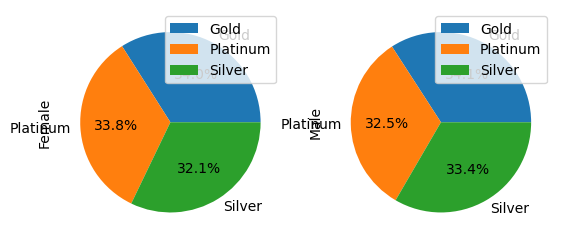

In [69]:
claim_pie.plot(kind='pie',labels=['Gold','Platinum','Silver'], subplots=True,autopct='%.1f%%',)

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.

In [71]:
gender_claim=unique_cust[unique_cust.incident_cause.isin(['Dricer error','Other driver error'])].groupby('gender').claim_amount.sum()

Text(0, 0.5, 'Claim Amount')

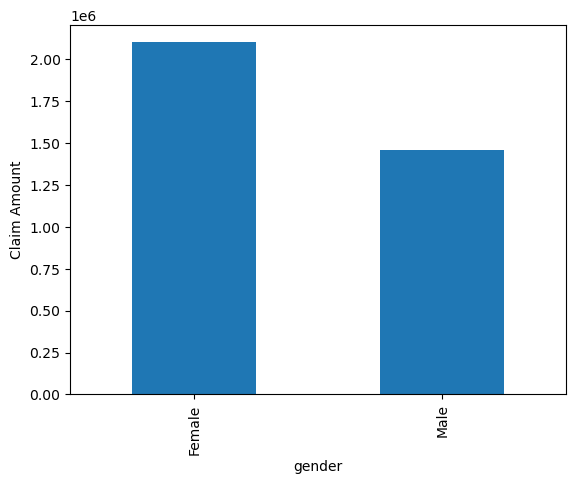

In [74]:
gender_claim.plot(kind='bar')
plt.ylabel('Claim Amount')

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on bar chart.

In [85]:
fraud=unique_cust.groupby('Age_group').fraudulent.count()

<Axes: xlabel='Age_group', ylabel='Fraud'>

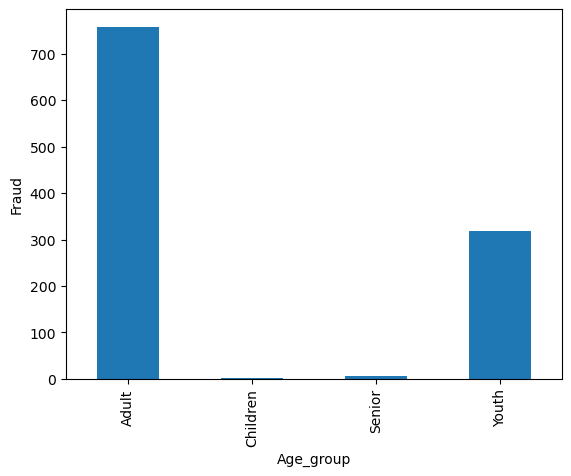

In [87]:
fraud.plot(kind='bar', ylabel='Fraud')

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the "month" axis, the month is in chronological order not alphabetical order.

In [100]:
unique_cust['month']=unique_cust.claim_date.apply(lambda x: x.month)

In [101]:
monthly_claim=unique_cust.groupby('month').claim_amount.sum()

In [102]:
monthly_claim

month
1.0     1332012.0
2.0     1133107.0
3.0     1320094.0
4.0     1276071.5
5.0     1114211.5
6.0     1276333.0
7.0     1379035.0
8.0      911203.5
9.0      980648.0
10.0    1422655.5
11.0     601125.0
12.0     696701.5
Name: claim_amount, dtype: float32

<Axes: xlabel='month', ylabel='Claim Amount'>

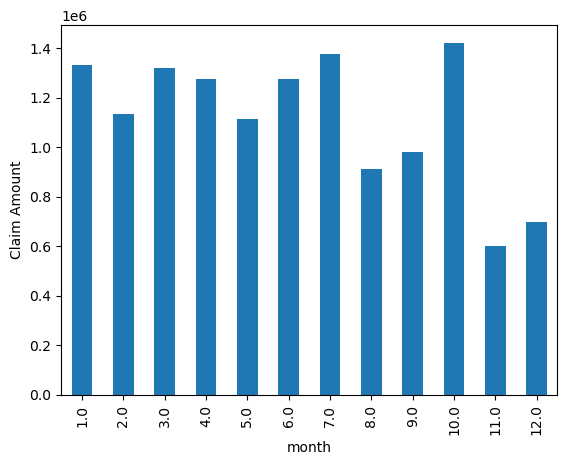

In [95]:
monthly_claim.plot(kind='bar', ylabel='Claim Amount')

# 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


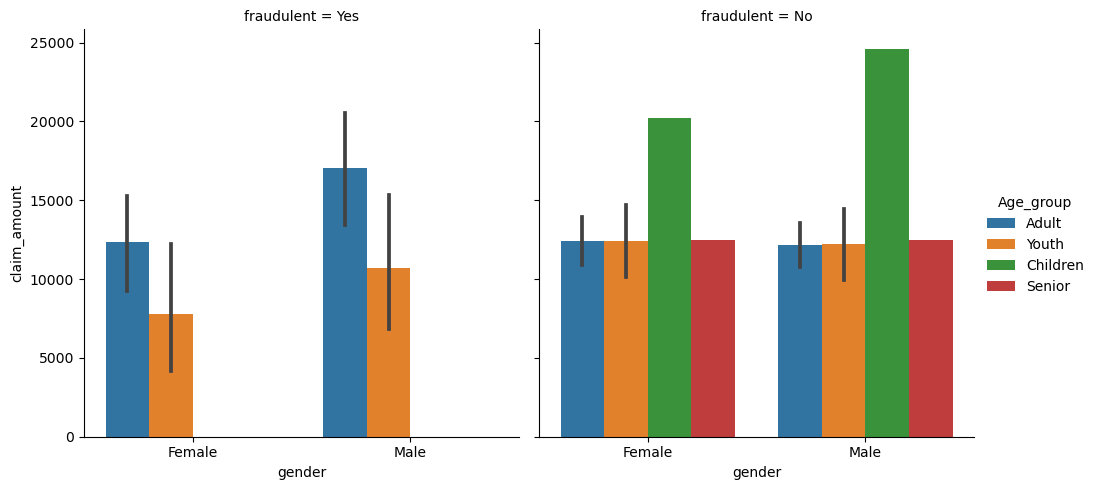

In [106]:
sns.catplot(data=unique_cust, x='gender', y='claim_amount', hue='Age_group', col='fraudulent', kind='bar')

# Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

# 16. Is there any similarity in the amount claimed by males and females?

In [107]:
f_claim=unique_cust.claim_amount[unique_cust.gender=='Female']
m_claim=unique_cust.claim_amount[unique_cust.gender=='Male']

In [108]:
# mean of claim amount for male and female
print('mean of male claim: ', m_claim.mean())
print('mean of female claim: ', f_claim.mean())

mean of male claim:  12821.543
mean of female claim:  12105.598


Hypothesis conditons
1. Ho- similarity in claim amounts,  Ha-Not similar
2. confidence: 95%
3. significance 5%
4. t- test 

In [110]:
# since hypothesis using t-test
stats.ttest_ind(m_claim,f_claim)

TtestResult(statistic=0.8848206621724444, pvalue=0.37644976200164215, df=1083.0)

1. data used: Gender and Claim Amount
2. test method used: t-test| independent sample testing
3. we accept null hypothesis since p-value is very high

4. This indicates there is similarity between claim amounts claimed by males and females

# 17. Is there any relationship between age category and segement?

In [111]:
relation=pd.crosstab(unique_cust.Age_group, unique_cust.Segment)

In [112]:
relation

Segment,Gold,Platinum,Silver
Age_group,,,
Adult,268,244,246
Children,1,1,0
Senior,1,3,3
Youth,102,116,100


In [115]:
# Ho: There is no relationship
# Ha: There is relation

# confidence: 95%
# significance: 5%

# chi2_contignency test

In [114]:
stats.chi2_contingency(relation)

Chi2ContingencyResult(statistic=4.202535990127085, pvalue=0.6492889827669299, dof=6, expected_freq=array([[259.88571429, 254.29677419, 243.81751152],
       [  0.68571429,   0.67096774,   0.64331797],
       [  2.4       ,   2.3483871 ,   2.2516129 ],
       [109.02857143, 106.68387097, 102.2875576 ]]))

In [117]:
# Data used: Age_group, Segment
# nethod of test: Chi2 test
# We accept the null hypothesis since p- value is in the confidence range
# There is no relation between age group and segment

# 18. The current year has shown a significant rise in the claim amounts as compared to 2016-17 fiscal average which was $ 10,000.

In [135]:
unique_cust.loc[unique_cust.claim_date.dt.year==2018].claim_amount.mean()

12687.266

In [128]:
# Ho: there is no significant change in claim amount
# Ha: There significant rise in claim amount 
# confidence : 95%
# significance: 5%

# test method: t-test 1 sample

In [131]:
stats.ttest_1samp(year_18,10000)

TtestResult(statistic=4.371256123261415, pvalue=1.5155209737733867e-05, df=480)

In [133]:
# data used: claim date, claim amount
# method used: t-test_1samp
# we reject null hypothesis since p-value is out of confidence region
# We can say there is significant rise in claim amount in 2018 in comparison to 2016-17 fiscal average of $ 10,000.

# 19. Is there any difference between age groups and insurance claims?

In [134]:
group1=unique_cust.loc[unique_cust.Age_group=='Children', 'claim_amount']
group2=unique_cust.loc[unique_cust.Age_group=='Youth', 'claim_amount']
group3=unique_cust.loc[unique_cust.Age_group=='Adult', 'claim_amount']
group4=unique_cust.loc[unique_cust.Age_group=='Senior', 'claim_amount']

<Axes: xlabel='Age_group', ylabel='claim_amount'>

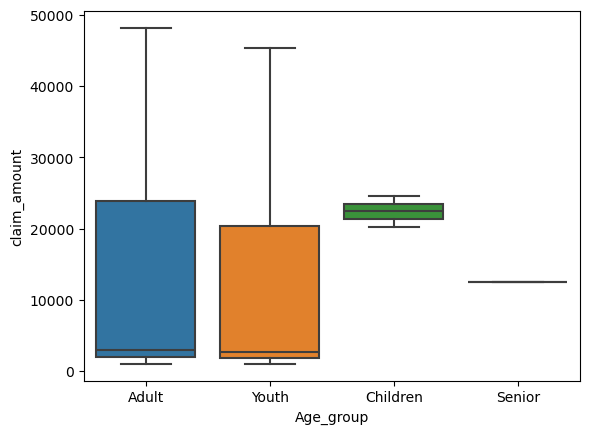

In [136]:
sns.boxplot(x=unique_cust.Age_group, y=unique_cust.claim_amount)

In [137]:
# Ho: There is no difference between age groups and insurance claims
# Ha: There is a difference between age groups and insurance claims

# confidence: 95%
# significance: 5%

# method: Anova

In [138]:
stats.f_oneway(group1,group2,group3, group4)

F_onewayResult(statistic=0.9807715094144442, pvalue=0.40101980683463445)

In [140]:
# from above we can infer that p- value is within the confidence region,
# Hence, We accept the null hypothesis whih implies there is no difference in agre groups and insurance claims.

# 20. Is there any relationship between total number of policy claims and the claim amount?

In [144]:
unique_cust.total_policy_claims.corr(other=unique_cust.claim_amount)

-0.014369036071438702

# Above correaltion with negative values show that the total number of isurance plolicy claims is inversely proportional to claim amount.

# Thank You! 